In [20]:
import math
import random
import copy
import numpy as np

# equations

In [21]:
def parabula(x):
    return x[0]**2 - x[1]

# selection

In [73]:
def selection(generation, barrier):
    #print(generation, barrier)
    list_ids = list(map(lambda sample: [sample[0], sample[1] >= barrier], enumerate(generation)))
    top_samples = []
    for sample in list_ids:
        if sample[1] == True:
            top_samples.append(sample[0])
    return top_samples

# test selection

In [23]:
generation = [10, 4, 100, 70, 60]
barrier = 50
correct_answer = [2, 3, 4]

assert correct_answer == selection(generation, barrier)
print('done!')

done!


# mutation

In [24]:
def mutation(generation, features, feature_range, number_of_mutations, vis_key = False):
    if vis_key == True:
        features_for_vis = copy.deepcopy(features)
    mutants = random.sample(generation, number_of_mutations)
    for mutant_id in mutants:
        skill_id = random.sample(range(len(features[mutant_id])), 1)[0]
        new_skill = random.sample(feature_range, 1)
        if vis_key == True:
            features_for_vis[mutant_id][skill_id] = new_skill
        features[mutant_id][skill_id] = new_skill[0]
    if vis_key == True:
        return features, features_for_vis
    return features

# test mutation

In [25]:
generation = [10, 4, 100, 70, 60]
generation_ids = range(len(generation))
features = [[10, 4, 4], [14, 21, 4], [10, 55, 1], [10, 4, 10], [10, 4, 10]]
feature_range = range(100)
number_of_mutations = 4
vis_key = True

new_features, new_features_for_vis = mutation(generation_ids, copy.deepcopy(features), feature_range, number_of_mutations, vis_key)
new_features1, new_features_for_vis1 = mutation(generation_ids, copy.deepcopy(features), feature_range, number_of_mutations, vis_key)
assert new_features != new_features1

print(features)
print(new_features_for_vis)
print(new_features_for_vis1)
print('done!')

[[10, 4, 4], [14, 21, 4], [10, 55, 1], [10, 4, 10], [10, 4, 10]]
[[10, [54], 4], [14, [9], 4], [10, 55, 1], [[24], 4, 10], [[30], 4, 10]]
[[10, 4, 4], [14, [90], 4], [10, 55, [36]], [10, [98], 10], [[14], 4, 10]]
done!


# reproduction

In [29]:
def make_child(father, mother, vis_key):
    alpha = random.sample(range(int(len(father) / 2)), 1)[0]
    alpha = -alpha % len(father)
    child = father[:alpha] + mother[alpha:]
    if vis_key == True:
        vis_child = [father[:alpha]], mother[alpha:]
        return child, vis_child
    return child

def reproduction(generation_results, features, num_of_children, barrier, vis_key= False):
    generation_ids = range(len(generation_results))
    elite_ids = selection(generation_results, barrier)
    new_generation_features = []
    vis_new_generation_features = []
    
    for child_id in range(num_of_children):
        father_id = random.sample(range(len(elite_ids)), 1)[0]
        mother_id = random.sample(range(len(generation_ids)), 1)[0]
        if vis_key == True:
            child, vis_child = make_child(features[father_id], features[mother_id], vis_key)
            vis_new_generation_features.append(vis_child)
        else:
            child = make_child(features[father_id], features[mother_id], vis_key)
        new_generation_features.append(child)
    if vis_key == True:
        return new_generation_features, vis_new_generation_features
    return new_generation_features


# test reproduction

In [30]:
generation_results = [10, 4, 100, 70, 60]
generation_ids = range(len(generation_results))
features = [[10, 4, 4], [14, 21, 4], [10, 55, 1], [10, 4, 10], [10, 4, 10]]
number_of_children = 10
barrier = 50

new_generation_features, vis_new_generation_features = reproduction(generation, features, number_of_children, barrier, True)
new_generation_features1, vis_new_generation_features1 = reproduction(generation, features, number_of_children, barrier, True)

assert new_generation_features != None
assert new_generation_features != new_generation_features1
assert len(new_generation_features) == number_of_children

print('new!')
print(vis_new_generation_features1)
print('new!')
print(vis_new_generation_features)
print('done!')

new!
[([[]], [10, 55, 1]), ([[]], [10, 4, 10]), ([[]], [10, 4, 10]), ([[]], [10, 4, 10]), ([[]], [10, 4, 4]), ([[]], [10, 4, 4]), ([[]], [10, 4, 4]), ([[]], [10, 4, 10]), ([[]], [10, 4, 4]), ([[]], [10, 4, 10])]
new!
[([[]], [10, 55, 1]), ([[]], [10, 55, 1]), ([[]], [10, 55, 1]), ([[]], [10, 4, 10]), ([[]], [10, 4, 10]), ([[]], [10, 4, 10]), ([[]], [14, 21, 4]), ([[]], [10, 4, 10]), ([[]], [10, 4, 4]), ([[]], [14, 21, 4])]
done!


# evaluate

In [31]:
def evaluate(features, function):
    generation_results = []
    for feature in features:
        generation_results.append(function(feature))
    return generation_results

# test evaluate

In [32]:
features = [[10, 4], [14, 21], [10, 1], [14, 10], [10, 40]]
features1 = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

generation_results = evaluate(features, parabula)
generation_results1 = evaluate(features1, parabula)

assert generation_results != None
assert generation_results1 != generation_results
assert np.sum(generation_results1) == 0

print(generation_results)
print('done!')

[96, 175, 99, 186, 60]
done!


# run genetic algorithm

In [75]:
def run_genetic_algorithm(features, function, old_generation_results, feature_range, num_of_children, barrier, speed_parameter, year):
    generation_results = evaluate(features, function)
    generation_ids = range(len(generation_results))
    if year % speed_parameter == 0:
        #print("mutation!")
        number_of_mutations = random.sample(range(len(generation_results)), 1)[0]
        features = mutation(generation_ids, copy.deepcopy(features), feature_range, number_of_mutations)
        generation_results = evaluate(features, function)
        result = np.average(old_generation_results)
        barrier = result
    features = reproduction(generation_results, features, num_of_children, barrier)
    return features

# final test

In [92]:
features = [[10, 4], [14, 21], [10, 1], [14, 10], [10, 40]]

function = parabula
init_results = np.average(evaluate(features, function))
print(evaluate(features, function))
print('init results: ', init_results)

life_time = 200
old_generation_results = init_results
feature_range = range(-40, 40) 
num_of_children = 1000
barrier = 10
speed_parameter = 2
History = []

for year in range(life_time):
    features = run_genetic_algorithm(features, function, old_generation_results, feature_range, num_of_children, barrier, speed_parameter, year)
    old_generation_results = evaluate(features, function)
    result = np.average(old_generation_results)
    History.append(result)
    barrier = result
    #print('results: ', result)
    
assert np.average(old_generation_results) > init_results
print('done!')
print('final result', np.average(old_generation_results))

[96, 175, 99, 186, 60]
init results:  123.2
done!
final result 564.33


# plot history

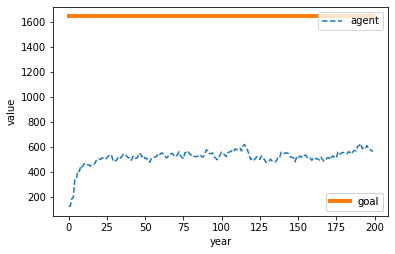

In [93]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('year')
ax.set_ylabel('value')

# Create a legend for the first line.
line1, = plt.plot(range(life_time), History, label="agent", linestyle='--')
line2, = plt.plot(range(life_time), [1640] * life_time, label="goal", linewidth=4)
first_legend = plt.legend(handles=[line1], loc=1)
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
second_legend = plt.legend(handles=[line2], loc=4)
ax = plt.gca().add_artist(second_legend)




#plt.plot(range(life_time), History)
#plt.plot(range(life_time), [1640] * life_time)
plt.show()